# Example NN

In [1]:
import tensorflow as tf
import numpy as np;

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_features = 10
n_dense_neurons = 3

In [4]:
x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [5]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [6]:
init = tf.global_variables_initializer()

In [7]:
with tf.Session() as sess:
    
    sess.run(init)
    layer_out = sess.run(a,feed_dict = {x : np.random.random([1,n_features])})

In [8]:
print(layer_out)
layer_out.shape

[[0.19775648 0.95430607 0.83868635]]


(1, 3)

## Simple Regression Example

In [9]:
np.random.seed(101)

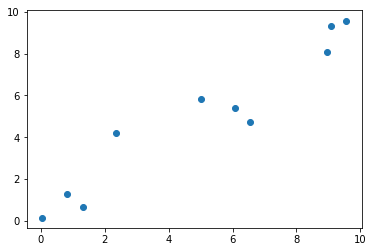

In [10]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.scatter(x_data,y_label)

y = mx + b

In [11]:
m = tf.Variable(0.3)  
b = tf.Variable(-0.1)

In [12]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [13]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(error) 

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

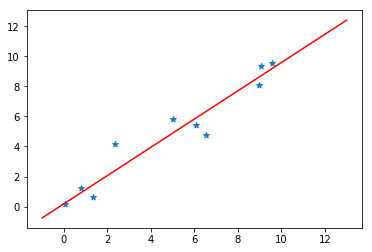

In [16]:
x_test = np.linspace(-1,13,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.scatter(x_data,y_label,marker='*')

In [17]:
print(final_slope, final_intercept)

0.93918926 0.18670674
